## Column Names and Description

In [12]:
"""
Columns
The following columns are available on the training set:

accepts_mercadopago Whether the item accepts Mercado Pago
available_quantity The available stock quantity at that moment
avg_asp_item_bday Average selling price of this item over the last days
avg_asp_item_domain Average price of items of the domain this item belongs to
avg_asp_item_sel Average price of seller sales
avg_gmv_item_bday average revenue generated by the item per day
avg_gmv_item_domain_30days Average revenue generated by the items of this domain on the last month
avg_gmv_item_sel Average revenue of items of this seller
avg_gmv_seller_bday Average revenue this seller makes by day
avg_orders_item_bday Average number of orders this item has by day
avg_orders_seller_bday Average orders the seller has by day
avg_qty_orders_item_domain_30days Average number of orders a random item of this domain made on the last month
avg_qty_orders_item_sel_30days Average number of orders an item of this seller makes on the last 30 days
avg_si_item_bday Average units sold this item has by day
avg_si_item_sel_30day Average units sold of an item of this seller on the past month
avg_visits_item Average visits this item had
benefit Ignore, should be dropped
boosted Whether the item was boosted
buy_server_timestamp Timestamp of the purchase
category_id Category of this item
conversion Target variable, it is True if this print has an attributed order
cus_cust_id Buyer id
cus_cust_id_sel Seller id
date Print date
deal_print_id Unique id for the print
decimals Ignore, will be dropped
domain_id Domain id for the item
etl_version Ignore, should be dropped
free_shipping Whether the item has free shipping
fulfillment Whether the item is fulfilled by MeLi
full_name Category full name
health Item health
is_pdp Whether the click landed on a PDP
product_id Product_id of the item
item_id ID of the item, useful for debugging
listing_type_id Whether the item is gold or not
logistic_type Logistic type for the item
main_picture URL for the main item picture
offset On which page the item was rendered
original_price Price from which the discount was done
platform Which platform the user is using
price Item price
print_position Position on the page
print_server_timestamp Timestamp for the print
qty_items_dom Number of items this domain has
qty_items_sel Number of items the seller has
rn Leftover from the ETL, Discard
ROW_ID Row of the submission file
site_id Site ID
sold_quantity Number of items sold at the moment of the print
tags Tags the item had at the moment of the print
title Item title
total_asp_item_domain_30days Average selling price of the items of the domain
total_asp_item_sel_30days Average selling price of all the items the seller sold on the last 30 days
total_gmv_domain_30days Total revenue the domain made on the last 30 days
total_gmv_domain_bday total_gmv_domain_30days / 30
total_gmv_item_30days Total revenue made by the item on the lasts 30 days
total_gmv_seller Total revenue made by the seller on the last month
total_items_domain Number of items on the domain
total_items_seller Number of items the seller has
total_orders_domain_30days Total orders on the domain
total_orders_item_30days Total orders the Item had on the last 30 days
total_orders_sel_30days Total orders for the seller
total_si_domain_30days Total units sold of this domain
total_si_item_30days Total units sold of this item
total_si_sel_30days Same for the seller
total_visits_domain Total visits on this domain
total_visits_item Total visits this item had
total_visits_seller Total visits for this seller
uid session id
user_id user id
warranty Whether the item had warranty
"""

'\nColumns\nThe following columns are available on the training set:\n\naccepts_mercadopago Whether the item accepts Mercado Pago\navailable_quantity The available stock quantity at that moment\navg_asp_item_bday Average selling price of this item over the last days\navg_asp_item_domain Average price of items of the domain this item belongs to\navg_asp_item_sel Average price of seller sales\navg_gmv_item_bday average revenue generated by the item per day\navg_gmv_item_domain_30days Average revenue generated by the items of this domain on the last month\navg_gmv_item_sel Average revenue of items of this seller\navg_gmv_seller_bday Average revenue this seller makes by day\navg_orders_item_bday Average number of orders this item has by day\navg_orders_seller_bday Average orders the seller has by day\navg_qty_orders_item_domain_30days Average number of orders a random item of this domain made on the last month\navg_qty_orders_item_sel_30days Average number of orders an item of this seller 

## Librerias

In [13]:
from IPython.display import display, Markdown

import pandas as pd
import gc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score

from sklearn.metrics import roc_auc_score

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval

from sklearn.tree import plot_tree

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, OneHotEncoder

# XGBoost
import xgboost as xgb

import numpy as np

import matplotlib.pyplot as plt

import itertools

from tqdm import tqdm

## Load Comp Data

In [14]:
comp_data = pd.read_csv("data/competition_data.csv")

In [15]:
comp_data.head()

,accepts_mercadopago,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,boosted,...,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,uid,user_id,warranty,ROW_ID
0,True,59,938.031376,2153.933091,135195.200333,3.430563,12.407860,13.691450,0.001,False,...,56717.0,17.0,25781.0,7993972,543,854813,cb5bfac7-229a-4e3e-96dd-80b2ad3972c1,NaN,Garantía de fábrica: 12 meses,NaN
1,True,37,159.826531,240.325973,19338.230000,3.142739,4.429577,4.511599,0.001,False,...,81455.0,5.0,10891.0,7821316,1789,1422288,b0f9aa19-00d5-4afd-aa77-45be7c849562,NaN,NaN,NaN
2,True,9,67.635391,86.066296,154.919333,2.633771,2.592593,2.722222,0.001,False,...,16792.0,8.0,147.0,1303909,1473,17801,fd59890a-f2c2-4282-b2ee-c68f25e20697,151157147.0,NaN,NaN
3,True,12,92.085756,332.848400,554.747333,3.280069,12.620000,12.840000,0.001,False,...,1988.0,14.0,642.0,139419,7473,44336,72340acf-2a1c-4214-a604-132e0cb56939,NaN,Garantía de fábrica: 90 días,NaN
4,True,5,156.905222,955.997475,3154.791667,2.737876,3.666667,4.363636,0.001,False,...,8707.0,32.0,432.0,209373,416,46206,84da1314-814c-4d4f-be23-3de9ea1da4b6,NaN,Garantía del vendedor: 90 días,NaN


In [16]:
comp_data.describe()

,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,conversion,health,...,total_orders_item_30days,total_orders_sel_30days,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,user_id,ROW_ID
count,199972.000000,195607.000000,195607.000000,195607.000000,195607.000000,195607.000000,195607.000000,199971.000000,180761.000000,199972.000000,...,195607.000000,195607.000000,195607.000000,195607.000000,195607.000000,1.999720e+05,199972.000000,1.999720e+05,1.783750e+05,19211.000000
mean,2142.683766,333.141264,1160.099822,10815.338962,4.385187,13.542561,18.286236,0.000976,0.092631,0.809401,...,65.176297,3941.158614,29197.693135,88.487667,5238.731257,2.170257e+06,5571.603790,2.542803e+05,2.246094e+08,9605.000000
std,11326.386712,492.836951,4284.246365,26377.753704,2.768258,25.645743,33.648431,0.000154,0.289915,0.146368,...,129.610777,5145.727129,49694.994203,220.606860,6809.183739,3.545316e+06,12108.897095,3.458552e+05,1.474232e+08,5545.882346
min,0.000000,4.909057,4.773333,0.660000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,4.000000,1.000000,2.000000,3.160000e+02,1.000000,1.100000e+01,1.610000e+02,0.000000
25%,19.000000,86.729688,143.184865,793.281667,2.876796,4.188679,4.916896,0.001000,0.000000,0.770000,...,6.000000,718.000000,3938.000000,7.000000,943.000000,1.899680e+05,407.000000,4.804600e+04,1.053200e+08,4802.500000
50%,67.000000,169.234106,262.266733,2733.067000,3.639912,6.768293,8.875000,0.001000,0.000000,0.810000,...,20.000000,2102.000000,11660.000000,24.000000,2713.000000,5.613990e+05,1496.000000,1.263900e+05,1.976426e+08,9605.000000
75%,371.000000,319.281502,675.989333,9217.855667,5.066384,13.403873,18.558559,0.001000,0.000000,0.900000,...,63.000000,5017.000000,38725.000000,80.000000,6455.000000,2.007145e+06,5248.000000,2.817150e+05,3.202613e+08,14407.500000
max,99999.000000,3778.257881,57282.961233,244988.442667,38.148629,258.363636,465.500000,0.001000,1.000000,1.000000,...,1853.000000,36492.000000,505258.000000,8269.000000,56189.000000,1.591114e+07,195413.000000,2.938795e+06,1.000014e+09,19210.000000


In [17]:
display(
    Markdown(
        "\n".join(
            [
                #"- **{}** ({}) \n\n {}".format(col, dtype, comp_data[col].value_counts()) for col, dtype in
                #"- **{}** ({})".format(col, dtype) for col, dtype in
                #zip(comp_data.columns, comp_data.dtypes)
                "- **{}**".format(col) for col in comp_data.columns
            ]
        )
    )
)

- **accepts_mercadopago**
- **available_quantity**
- **avg_gmv_item_domain_30days**
- **avg_gmv_item_sel**
- **avg_gmv_seller_bday**
- **avg_qty_orders_item_domain_30days**
- **avg_qty_orders_item_sel_30days**
- **avg_si_item_sel_30day**
- **benefit**
- **boosted**
- **category_id**
- **conversion**
- **date**
- **deal_print_id**
- **domain_id**
- **etl_version**
- **free_shipping**
- **fulfillment**
- **full_name**
- **health**
- **is_pdp**
- **product_id**
- **item_id**
- **listing_type_id**
- **logistic_type**
- **main_picture**
- **offset**
- **original_price**
- **platform**
- **price**
- **print_position**
- **print_server_timestamp**
- **qty_items_dom**
- **qty_items_sel**
- **site_id**
- **sold_quantity**
- **tags**
- **title**
- **total_asp_item_domain_30days**
- **total_asp_item_sel_30days**
- **total_gmv_domain_bday**
- **total_gmv_item_30days**
- **total_items_domain**
- **total_items_seller**
- **total_orders_domain_30days**
- **total_orders_item_30days**
- **total_orders_sel_30days**
- **total_si_domain_30days**
- **total_si_item_30days**
- **total_si_sel_30days**
- **total_visits_domain**
- **total_visits_item**
- **total_visits_seller**
- **uid**
- **user_id**
- **warranty**
- **ROW_ID**

## Data Cleaning

In [18]:
comp_data = pd.read_csv("data/competition_data.csv")
comp_data = comp_data.drop(
        columns=[
            "accepts_mercadopago", # Todos tienen mercadopago
            "boosted", # Ninguno
            "avg_qty_orders_item_domain_30days",
            "avg_qty_orders_item_sel_30days",
            "avg_si_item_sel_30day",
            #"date",
            "deal_print_id",
            "etl_version",
            "full_name",
            "main_picture",
            "print_server_timestamp",
            #"title",
            "uid",
            #"user_id",
            "avg_gmv_item_domain_30days",
            #"avg_gmv_item_sel",
            "avg_gmv_seller_bday",
            #"qty_items_dom",
            #"category_id",
            #"domain_id",
            "product_id",
            #"listing_type_id",
            "logistic_type",
            "site_id",
            #"tags",
            "total_asp_item_sel_30days", 
            "total_gmv_domain_bday", 
            #"total_items_domain", 
            "total_items_seller", 
            "total_orders_domain_30days", 
            "total_orders_item_30days", 
            "total_orders_sel_30days", 
            "total_si_sel_30days", 
            #"total_visits_domain", 
            #"total_visits_item", 
            #"total_visits_seller",
            "total_asp_item_domain_30days",
            "total_gmv_item_30days",
            "total_si_domain_30days",
            "total_si_item_30days",
            "warranty",
            # "offset",
        ]
    )

In [19]:
display(
    Markdown(
        "\n".join(
            [
                #"- **{}** ({}) \n\n {}".format(col, dtype, comp_data[col].value_counts()) for col, dtype in
                #"- **{}** ({})".format(col, dtype) for col, dtype in
                #zip(comp_data.columns, comp_data.dtypes)
                "- **{}**".format(col) for col in comp_data.columns
            ]
        )
    )
)

- **available_quantity**
- **avg_gmv_item_sel**
- **benefit**
- **category_id**
- **conversion**
- **date**
- **domain_id**
- **free_shipping**
- **fulfillment**
- **health**
- **is_pdp**
- **item_id**
- **listing_type_id**
- **offset**
- **original_price**
- **platform**
- **price**
- **print_position**
- **qty_items_dom**
- **qty_items_sel**
- **sold_quantity**
- **tags**
- **title**
- **total_items_domain**
- **total_visits_domain**
- **total_visits_item**
- **total_visits_seller**
- **user_id**
- **ROW_ID**

In [20]:
tags = comp_data["tags"].str.replace("[", "").str.replace("]", "").str.split(", ").apply(pd.Series).stack().value_counts()

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_83499/609051089.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tags = comp_data["tags"].str.replace("[", "").str.replace("]", "").str.split(", ").apply(pd.Series).stack().value_counts()


In [21]:
# tags

In [22]:
# # For tag in tags, create a new column with the tag name and a boolean value
for tag in tags.index:
    comp_data[tag] = comp_data["tags"].str.contains(tag).astype(int)

comp_data["tags_count"] = comp_data["tags"].str.replace("[", "").str.replace("]", "").str.split(", ").apply(len)

comp_data = comp_data.drop("tags", axis=1)

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_83499/1450897619.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  comp_data["tags_count"] = comp_data["tags"].str.replace("[", "").str.replace("]", "").str.split(", ").apply(len)


In [23]:
comp_data["category_id"].value_counts()

MLA109027    12333
MLA1055       8641
MLA3724       5870
MLA1002       5446
MLA3697       4154
             ...  
MLA412712        1
MLA429714        1
MLA392534        1
MLA417046        1
MLA9695          1
Name: category_id, Length: 2284, dtype: int64

In [24]:
# comp_data["domain_id"] = LabelEncoder().fit_transform(comp_data["domain_id"]).astype(int)
# comp_data["product_id"] = LabelEncoder().fit_transform(comp_data["product_id"]).astype(int)

# OneHotEncoder
# comp_data = pd.get_dummies(comp_data, columns=["category_id"], dtype=int, sparse=True, dummy_na = False)
# Add category_id ohe category column if that category has more than 1000 ocurrences
# ocurrences = comp_data["category_id"].value_counts()
# for category_id in ocurrences[ocurrences > 1000].index:
#     comp_data["category_id_" + str(category_id)] = comp_data["category_id"] == category_id
#     comp_data["category_id_" + str(category_id)] = comp_data["category_id_" + str(category_id)].astype(int)
# comp_data = comp_data.drop(columns=["category_id"])

# comp_data = pd.get_dummies(comp_data, columns=["logistic_type"], dtype=int, sparse=True, dummy_na = False)

In [25]:
comp_data["date"] = pd.to_datetime(comp_data["date"])
comp_data["day"] = comp_data["date"].dt.day
comp_data["month"] = comp_data["date"].dt.month
#comp_data["hour"] = comp_data["date"].dt.hour
# comp_data["year"] = comp_data["date"].dt.year
comp_data["dayofweek"] = comp_data["date"].dt.dayofweek
# comp_data["weekofyear"] = comp_data["date"].dt.isocalendar().week
#comp_data["quarter"] = comp_data["date"].dt.quarter
# comp_data["hour"] = comp_data["date"].dt.hour
# comp_data["minute"] = comp_data["date"].dt.minute


In [26]:
comp_data["date"].min(), comp_data["date"].max()

(Timestamp('2020-03-01 00:00:00'), Timestamp('2020-04-25 00:00:00'))

In [27]:
comp_data = comp_data.drop(columns=["date"])

### Parse boolean columns

In [28]:

# comp_data["boosted"] = comp_data["boosted"].astype(int)
comp_data["free_shipping"] = comp_data["free_shipping"].astype(int)
comp_data["fulfillment"] = comp_data["fulfillment"].astype(int)

comp_data["imp_is_pdp"] = comp_data["is_pdp"].isna().astype(int)
comp_data["is_pdp"].fillna(0, inplace=True)
comp_data["is_pdp"] = comp_data["is_pdp"].astype(int)

comp_data["imp_user_id"] = comp_data["user_id"].isna().astype(int)
comp_data["user_id"] = comp_data["user_id"].fillna(0).astype(int)

comp_data["listing_type_id"] = comp_data["listing_type_id"].apply(lambda x: 0 if x == "gold_special" else 1)

### Encoding

In [29]:
# LabelEncoder
comp_data["platform"] = LabelEncoder().fit_transform(comp_data["platform"]).astype(int)
#comp_data["category_id"] = LabelEncoder().fit_transform(comp_data["category_id"]).astype(int)
comp_data["domain_id"] = LabelEncoder().fit_transform(comp_data["domain_id"]).astype(int)

# OHE
comp_data = pd.get_dummies(comp_data,
                        columns = [
                            # "platform",
                            "category_id",
                            # "domain_id"
                            ],
                        sparse = True,    # Devolver una matriz rala.
                        dummy_na = False, # No agregar columna para NaNs.
                        dtype = int       # XGBoost no trabaja con 'object'; necesitamos que sean numéricos.
                       )


# Encode category_id as a number, but number is based on ocurrences of category_id
# ! Has data leakage
# ocurrences = comp_data["category_id"].value_counts()
# for category_id in ocurrences.index:
#     comp_data["category_id"] = comp_data["category_id"].replace(category_id, ocurrences[category_id])

### New columns

In [30]:
comp_data["price_diff"] = comp_data["price"] - comp_data["original_price"]
comp_data["price_diff"] = comp_data["price_diff"].apply(lambda x: abs(x)).astype(int)

comp_data["discount"] = (comp_data["original_price"] - comp_data["price"]) / comp_data["original_price"]
comp_data["discount"] = comp_data["discount"].apply(lambda x: 1 if x == np.inf else x)

comp_data["price_ratio"] = comp_data["price"] / comp_data["original_price"]
comp_data["price_ratio"] = comp_data["price_ratio"].apply(lambda x: 1 if x == np.inf else x)

comp_data["is_discount"] = comp_data["discount"].apply(lambda x: 1 if x > 0 else 0)

comp_data["title_length"] = comp_data["title"].str.len()
comp_data["title_word_count"] = comp_data["title"].str.split(" ").apply(len)

comp_data["title_length_word_count"] = comp_data["title_length"] / comp_data["title_word_count"]
comp_data["title_length_word_count"] = comp_data["title_length_word_count"].apply(lambda x: 1 if x == np.inf else x)

comp_data["domain_dominance"] = comp_data["sold_quantity"] / comp_data["qty_items_dom"]

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_83499/879415600.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_data["price_diff"] = comp_data["price"] - comp_data["original_price"]
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_83499/879415600.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_data["discount"] = (comp_data["original_price"] - comp_data["price"]) / comp_data["original_price"]
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_83499/879415600.py:7: PerformanceWarnin

In [31]:
# Show comp_data sorted by comp_data["title_length_word_count"]
# comp_data.sort_values(by="title_length_word_count")["title"]

In [32]:
# comp_data["title"].str.split(" ").apply(len)

In [33]:
# comp_data["title"].str.len()

In [34]:
# Ratios
# is_pdp / total_visits_item
# is_pdp / total_visits_seller

comp_data["is_pdp_tvi"] = comp_data["is_pdp"] / comp_data["total_visits_item"]
comp_data["is_pdp_tvs"] = comp_data["is_pdp"] / comp_data["total_visits_seller"]

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_83499/30535199.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_data["is_pdp_tvi"] = comp_data["is_pdp"] / comp_data["total_visits_item"]
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_83499/30535199.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_data["is_pdp_tvs"] = comp_data["is_pdp"] / comp_data["total_visits_seller"]


## Exploratory

In [35]:
# Check this columns for variance
# accepts_mercadopago
# available_quantity
# avg_gmv_item_domain_30days
# avg_gmv_item_sel
# avg_gmv_seller_bday
# avg_qty_orders_item_domain_30days
# avg_qty_orders_item_sel_30days
# avg_si_item_sel_30day
# benefit
# boosted
# category_id
# conversion
# date
# deal_print_id
# domain_id
# etl_version
# free_shipping
# fulfillment
# full_name
# health
# is_pdp
# product_id
# item_id
# listing_type_id
# logistic_type
# main_picture
# offset
# original_price
# platform
# price
# print_position
# print_server_timestamp
# qty_items_dom
# qty_items_sel
# old_quantity
# tags
# title
# total_asp_item_domain_30days
# total_asp_item_sel_30days
# total_gmv_domain_bday
# total_gmv_item_30days
# total_items_domain
# total_items_seller
# total_orders_domain_30days
# total_orders_item_30days
# total_orders_sel_30days
# total_si_domain_30days
# total_si_item_30days
# total_si_sel_30days
# total_visits_domain
# total_visits_item
# total_visits_seller
# uid
# user_id
# warranty

# for col in comp_data.columns:
#     print()
#     print(col)
#     print(comp_data[col].value_counts().head(5))

In [36]:
# comp_data.groupby("user_id")["conversion"].sum()
# comp_data[comp_data["conversion"] == True]["user_id"].value_counts()

In [37]:
# Balance conversion
# comp_data = comp_data.drop(comp_data[comp_data["conversion"] == False].sample(frac=.5).index)

In [38]:
# comp_data["conversion"].value_counts()

## Plots

In [39]:
# # Plot 'offset' vs 'category_id' . Dot color depends on 'conversion'

# plt.scatter(new_test_data["offset"], new_test_data["discount"], c=new_test_data["conversion"])

In [40]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(
#     new_test_data["offset"],
#     new_test_data["discount"],
#     new_test_data["is_pdp"],
#     c=new_test_data["conversion"],
#     # cmap="coolwarm",
#     alpha=.5
# )

# ax.set_xlabel("offset")
# ax.set_ylabel("discount")
# ax.set_zlabel("is_pdp")


In [41]:
# # Plot 'offset', 'discount', 'category_id' in 3D. Dot color depends on 'conversion'

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(
#     new_test_data["offset"],
#     new_test_data["discount"],
#     new_test_data["price_diff"],
#     c=new_test_data["conversion"],
#     # cmap="coolwarm",
#     alpha=.5
# )

# ax.set_xlabel("offset")
# ax.set_ylabel("discount")
# ax.set_zlabel("price_diff")


In [42]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# # ax = fig.add_subplot(111)
# ax.scatter(
#     new_test_data["offset"],
#     new_test_data["price_diff"],
#     new_test_data["offset"] ** 2 + new_test_data["price_diff"]**2,
#     c=new_test_data["conversion"],
# )

# plt.show()

In [43]:
# # Plot hist boosted
# plot_data = comp_data.groupby("is_pdp")["conversion"].sum()
# plot_data


In [44]:
# Plot hour vs conversion
#comp_data.groupby("dayofweek")["conversion"].mean().plot()

### Split Comp Data -> Full | Eval

In [45]:
full_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
# del comp_data
gc.collect()

16

In [46]:
df = pd.read_csv("data/competition_data.csv")
print(df.isna().sum()[df.isna().sum() > 0])
del df
gc.collect()

avg_gmv_item_domain_30days             4365
avg_gmv_item_sel                       4365
avg_gmv_seller_bday                    4365
avg_qty_orders_item_domain_30days      4365
avg_qty_orders_item_sel_30days         4365
avg_si_item_sel_30day                  4365
benefit                                   1
conversion                            19211
is_pdp                                90184
product_id                           152362
main_picture                           3831
qty_items_dom                          4365
qty_items_sel                          4365
total_asp_item_domain_30days           4365
total_asp_item_sel_30days              4365
total_gmv_domain_bday                  4365
total_gmv_item_30days                  4365
total_orders_domain_30days             4365
total_orders_item_30days               4365
total_orders_sel_30days                4365
total_si_domain_30days                 4365
total_si_item_30days                   4365
total_si_sel_30days             

0

In [47]:
# Count nan values per column

full_data.isna().sum()[full_data.isna().sum() > 0]

avg_gmv_item_sel      3924
benefit                  1
qty_items_dom         3924
qty_items_sel         3924
ROW_ID              180761
domain_dominance      3924
dtype: int64

In [48]:
# The following cols have nan values
# avg_gmv_item_sel
# qty_items_dom
# qty_items_sel
# domain_dominance depends on qty_items_dom

# For those columns, are the rows with nan values the same?

full_data[full_data["avg_gmv_item_sel"].isna()]["qty_items_dom"].isna().sum(), full_data[full_data["avg_gmv_item_sel"].isna()]["qty_items_sel"].isna().sum(), full_data[full_data["avg_gmv_item_sel"].isna()]["domain_dominance"].isna().sum()

# Yes, they are the same rows

(3924, 3924, 3924)

In [49]:
# Drop those rows

full_data = full_data.dropna(subset=["avg_gmv_item_sel"])

In [50]:
# Count nan values per column

full_data.isna().sum()[full_data.isna().sum() > 0]

benefit         1
ROW_ID     176837
dtype: int64

### Train Test Split

In [51]:
# Shuffle
full_data = full_data.sample(frac=1, random_state=19092140).reset_index(drop=True)

train_data, test_data = train_test_split(full_data, test_size=0.25, train_size=0.75, random_state=42)

### Balancing

In [52]:
train_data["conversion"].value_counts()

0.0    120186
1.0     12441
Name: conversion, dtype: int64

In [53]:
test_data["conversion"].value_counts()

0.0    40081
1.0     4129
Name: conversion, dtype: int64

In [54]:
count_converts_test = test_data[test_data["conversion"] == True].shape[0]
count_not_converts_test = test_data[test_data["conversion"] == False].shape[0]
ratio = count_converts_test / count_not_converts_test

# From test_data, keep ratio of count_not_converts_test entries

not_converts = test_data[test_data["conversion"] == False].sample(frac=ratio)

new_test_data = pd.concat([test_data[test_data["conversion"] == True], not_converts])
new_test_data["conversion"].value_counts()

1.0    4129
0.0    4129
Name: conversion, dtype: int64

In [55]:
# ! Oversample, repeats into Validation
# train_data = train_data.append(train_data[train_data["conversion"] == True].sample(frac=1, replace=True))
# train_data = train_data.append(train_data[train_data["conversion"] == True].sample(frac=1, replace=True))
# train_data["conversion"].value_counts()

In [56]:
y_train = train_data["conversion"]
X_train = train_data.drop(columns=["conversion", "ROW_ID"])
X_train = X_train.select_dtypes(include='number')

y_test = test_data["conversion"]
X_test = test_data.drop(columns=["conversion", "ROW_ID"])
X_test = X_test.select_dtypes(include='number')

del train_data
del test_data

gc.collect()

0

### Validation Split

In [57]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, train_size=0.75, random_state=42)

## Models

### XGBoost

In [58]:
random_state = 12345

In [59]:
xgb1_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = random_state,
    eval_metric = 'auc',
    n_jobs=-1,
    #base_score=0.74
)

xgb1_model.fit(X_train_sub, y_train_sub, eval_set=[(X_val, y_val)], verbose=20)

[0]	validation_0-auc:0.86395


KeyboardInterrupt: 

In [ ]:
roc_auc_score(y_test, xgb1_model.predict_proba(X_test)[:, xgb1_model.classes_ == 1])

0.8880737709681812

<Axes: title={'center': 'Feature importance'}, xlabel='Gain', ylabel='Features'>

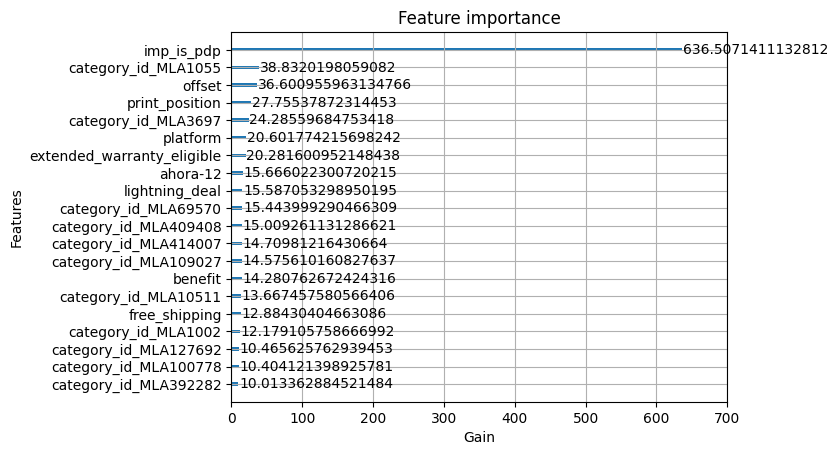

In [ ]:
# Feature Importance
xgb.plot_importance(xgb1_model, max_num_features=20, importance_type="gain", xlabel="Gain")

In [ ]:
# Get Feature Importance from the classifier xgb1_model
feature_importances = pd.DataFrame(
    xgb1_model.feature_importances_,
    index = X_train.columns,
    columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(20)

,importance
imp_is_pdp,0.368142
category_id_MLA1055,0.022460
offset,0.021169
print_position,0.016053
category_id_MLA3697,0.014046
platform,0.011916
extended_warranty_eligible,0.011730
ahora-12,0.009061
lightning_deal,0.009015
category_id_MLA69570,0.008932


In [ ]:
# Add gain column
gains = sorted(xgb1_model.get_booster().get_score(importance_type="gain").items(), key=lambda x: x[1], reverse=True)

gains_pd = pd.DataFrame(gains, columns=["feature", "gain"]).set_index("feature").sort_values("gain", ascending=False)

gains_pd.head(20)

,gain
feature,
imp_is_pdp,636.507141
category_id_MLA1055,38.832020
offset,36.600956
print_position,27.755379
category_id_MLA3697,24.285597
platform,20.601774
extended_warranty_eligible,20.281601
ahora-12,15.666022
lightning_deal,15.587053


In [ ]:
feature_importances.head(20)

,importance
imp_is_pdp,0.368142
category_id_MLA1055,0.022460
offset,0.021169
print_position,0.016053
category_id_MLA3697,0.014046
platform,0.011916
extended_warranty_eligible,0.011730
ahora-12,0.009061
lightning_deal,0.009015
category_id_MLA69570,0.008932


In [ ]:
xgb2_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = random_state,
    n_jobs=-1,
)

reduced_cols = gains_pd.head(20).index

xgb2_model.fit(X_train, y_train)

roc_auc_score(y_test, xgb2_model.predict_proba(X_test)[:, xgb2_model.classes_ == 1])

0.8891671869620615

<Axes: title={'center': 'Feature importance'}, xlabel='Gain', ylabel='Features'>

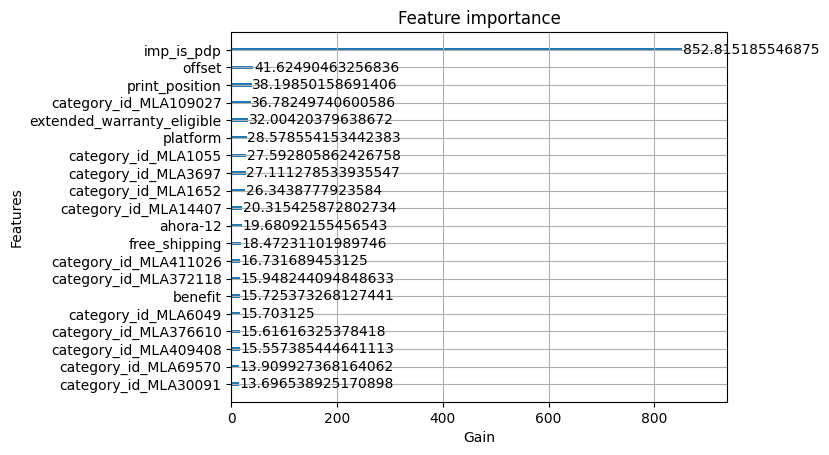

In [ ]:
# Feature Importance
xgb.plot_importance(xgb2_model, max_num_features=20, importance_type="gain", xlabel="Gain")

<Axes: title={'center': 'Feature importance'}, xlabel='Gain', ylabel='Features'>

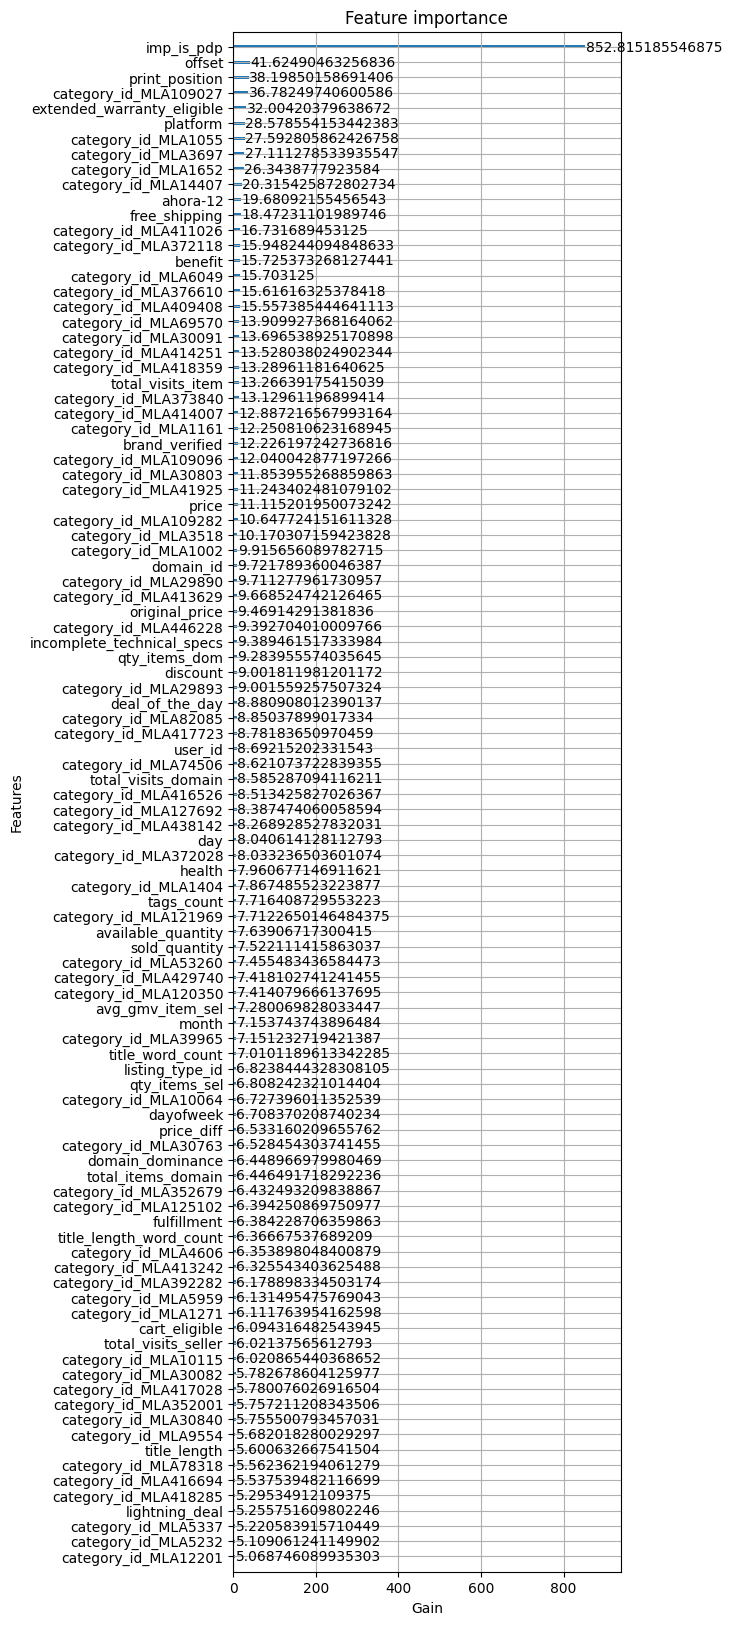

In [ ]:
# Feature Importance
fig, ax = plt.subplots(figsize=(5, 20))

xgb.plot_importance(xgb2_model, max_num_features=100, importance_type="gain", xlabel="Gain", ax=ax)

In [ ]:
# for i in range(10, len(gains_pd.index)):

#     xgb3_model = xgb.XGBClassifier(
#         objective = 'binary:logistic',
#         seed = random_state,
#         n_jobs=-1,
#     )

#     reduced_cols = gains_pd.head(i).index

#     xgb3_model.fit(X_train[reduced_cols], y_train)

#     score = roc_auc_score(y_test, xgb3_model.predict_proba(X_test[reduced_cols])[:, xgb3_model.classes_ == 1])

#     print(i, score)


In [ ]:
full_cols = gains_pd.index

In [ ]:
#list(itertools.permutations(full_cols, 3))

In [ ]:
# # Combinations of columns

# scores = {}
# max_score = 0
# max_cols = []

# alt_cols = list(itertools.permutations(full_cols[:10], 3))
# t = tqdm(alt_cols)
# for cols in t:

#     xgb3_model = xgb.XGBClassifier(
#         objective = 'binary:logistic',
#         seed = random_state,
#         n_jobs=-1,
#     )

#     xgb3_model.fit(X_train[list(cols)], y_train)

#     score = roc_auc_score(y_test, xgb3_model.predict_proba(X_test[list(cols)])[:, xgb3_model.classes_ == 1])


#     c1, c2, c3 = cols
#     if c1 not in scores:
#         scores[c1] = {}
#     if c2 not in scores[c1]:
#         scores[c1][c2] = {}
#     scores[c1][c2][c3] = score

#     if score > max_score:
#         max_score = score
#         max_cols = cols
#         #print(cols, score)
#         t.set_postfix({"score": score, "cols": cols})
#         t.refresh()

## Retrain Model with Validation Data

In [ ]:
del comp_data
del full_data
gc.collect()

In [60]:
xgb4_model = make_pipeline(
    SimpleImputer(strategy="median"),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=True),
    xgb.XGBClassifier(
        objective = 'binary:logistic',
        seed = random_state,
        n_jobs=-1,
    )
)

xgb4_model.fit(X_train, y_train)

roc_auc_score(y_test, xgb4_model.predict_proba(X_test)[:, xgb4_model.classes_ == 1])

/Users/nacho/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/nacho/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


: 

: 

In [ ]:
new_X_test = new_test_data.drop(columns=["conversion", "ROW_ID"])
new_X_test = new_X_test.select_dtypes(include='number')

new_y_test = new_test_data["conversion"]

roc_auc_score(new_y_test, xgb2_model.predict_proba(new_X_test)[:, xgb2_model.classes_ == 1])

/Users/nacho/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.8848294418305834

In [ ]:
# Confusion Matrix for xgb2_model on new_test_data

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(new_y_test, xgb2_model.predict(new_X_test))

true_neg, false_pos, false_neg, true_pos = conf_mx.ravel()

true_neg, false_pos, false_neg, true_pos

/Users/nacho/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:787: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


(4060, 69, 3460, 669)

In [ ]:
""" xgb3_model = make_pipeline(
    SimpleImputer(strategy="median"),
    xgb.XGBClassifier(
        objective = 'binary:logistic',
        seed = random_state,
        n_jobs=-1,
    )
)

xgb3_model.fit(X_train, y_train)

roc_auc_score(y_test, xgb3_model.predict_proba(X_test)[:, xgb3_model.classes_ == 1]) """

' xgb3_model = make_pipeline(\n    SimpleImputer(strategy="median"),\n    xgb.XGBClassifier(\n        objective = \'binary:logistic\',\n        seed = random_state,\n        n_jobs=-1,\n    )\n)\n\nxgb3_model.fit(X_train, y_train)\n\nroc_auc_score(y_test, xgb3_model.predict_proba(X_test)[:, xgb3_model.classes_ == 1]) '

## Create Submission

In [ ]:
# model = xgb2_model

# eval_data = comp_data[comp_data["ROW_ID"].notna()]
# # del comp_data

# # Predict on the evaluation set
# # eval_data = eval_data.drop(columns=["conversion"])
# eval_data = eval_data.select_dtypes(include='number')
# y_preds = model.predict_proba(eval_data[reduced_cols])[:, model.classes_ == 1].squeeze()

# # Make the submission file
# submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
# submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
# submission_df.to_csv("los_simuladores_XGB_2_Imputed_is_pdp_ohe+le.csv", index=False)

# del eval_data
# del submission_df
# gc.collect()

0